In [ ]:
!pip3 install pixellib
import pixellib
from pixellib.custom_train import instance_custom_training

     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-cp37-none-any.whl size=16033 sha256=e507d1cc635aaa4fe00842fc6f8a08137d93b602921f7e216faa840afc8bed8b
  Stored in directory: /root/.cache/pip/wheels/73/93/1c/9e2fc52eb74441941bc76cac441ddcc2c7ad67b18e1849e62a
Successfully built imantics


In [ ]:
!cp -r "./drive/MyDrive/Datasets/Nature" "."

In [ ]:
vis_img = instance_custom_training()
vis_img.load_dataset("Nature")

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.7/dist-packages (1.8.1+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.7/dist-packages (0.9.1+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-9y3_xmq4
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-9y3_xmq4
     |████████████████████████████████| 645kB 13.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-cp37-none-any.whl size=62712 sha256=df463743f158cd890d56a863b40f6c32a43c2f36dcc3b52e9a600bc997554ad8
  Stored in directory: /tmp/pip-ephem-wheel-cache-j8yczhsk/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
Successfully built fvcore
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


'1.8.1+cu101'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 11382 (delta 5), reused 15 (delta 5), pack-reused 11337
Receiving objects: 100% (11382/11382), 4.58 MiB | 7.22 MiB/s, done.
Resolving deltas: 100% (8285/8285), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 112kB 27.9MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=608b293e2525b4e7a32e81dd077e954d04d7914bb565fe60d90b8896593fd5dc
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
  Found existing installation: iopath 0.1.8
    Uninstalling iopath-0.1.8:
      Successfully uninstalled iopath-0.1.8
  Running setup.py develop for detectron2


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("Nature_train", {}, "./Nature/train.json", "./Nature/train")
register_coco_instances("Nature_test", {}, "./Nature/test.json", "./Nature/test")

In [ ]:
train_metadata = MetadataCatalog.get("Nature_train")
dataset_dicts = DatasetCatalog.get("Nature_train")

[03/31 05:05:34 d2.data.datasets.coco]: Loaded 600 images in COCO format from ./Nature/train.json


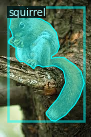

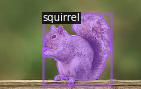

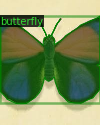

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("Nature_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/31 05:05:53 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:08, 20.7MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[03/31 05:06:04 d2.engine.train_loop]: Starting training from iteration 0
[03/31 05:06:13 d2.utils.events]:  eta: 0:07:51  iter: 19  total_loss: 2.049  loss_cls: 1.209  loss_box_reg: 0.1242  loss_mask: 0.697  loss_rpn_cls: 0.003184  loss_rpn_loc: 0.006511  time: 0.4631  data_time: 0.0176  lr: 4.9953e-06  max_mem: 2768M
[03/31 05:06:23 d2.utils.events]:  eta: 0:07:43  iter: 39  total_loss: 1.906  loss_cls: 1.027  loss_box_reg: 0.1059  loss_mask: 0.6932  loss_rpn_cls: 0.003343  loss_rpn_loc: 0.007601  time: 0.4691  data_time: 0.0101  lr: 9.9902e-06  max_mem: 2768M
[03/31 05:06:33 d2.utils.events]:  eta: 0:07:47  iter: 59  total_loss: 1.576  loss_cls: 0.774  loss_box_reg: 0.1076  loss_mask: 0.6827  loss_rpn_cls: 0.002658  loss_rpn_loc: 0.007015  time: 0.4763  data_time: 0.0065  lr: 1.4985e-05  max_mem: 2768M
[03/31 05:06:43 d2.utils.events]:  eta: 0:07:41  iter: 79  total_loss: 1.346  loss_cls: 0.5331  loss_box_reg: 0.1324  loss_mask: 0.6686  loss_rpn_cls: 0.00288  loss_rpn_loc: 0.007527 

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


evaluator = COCOEvaluator("Nature_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "Nature_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [03/31 05:15:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[03/31 05:15:02 d2.data.datasets.coco]: Loaded 200 images in COCO format from ./Nature/test.json
[03/31 05:15:02 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|  squirrel  | 109          | butterfly  | 107          |
|            |              |            |              |
|   total    | 216          |            |              |
[03/31 05:15:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/31 05:15:02 d2.data.common]: Serializing 200 elements to byte tensors and concatenating them all ...
[03/31 05:15:02 d2.data.common]: Serialized dataset takes 0.34 MiB
[03/31 05:

OrderedDict([('bbox',
              {'AP': 63.750261415109335,
               'AP-butterfly': 62.51634458946014,
               'AP-squirrel': 64.98417824075852,
               'AP50': 96.9523700466372,
               'AP75': 75.51355754288545,
               'APl': 64.12578175810975,
               'APm': nan,
               'APs': nan}),
             ('segm',
              {'AP': 73.76999013211089,
               'AP-butterfly': 78.83337865053703,
               'AP-squirrel': 68.70660161368478,
               'AP50': 96.44152588743276,
               'AP75': 84.61945520208538,
               'APl': 76.35823440626156,
               'APm': nan,
               'APs': nan})])

In [ ]:
!mv "./output" "./drive/MyDrive/Datasets/Nature/"

In [ ]:
!mv  "./Nature" "./drive/MyDrive/Datasets/Nature/"